Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-255.831,-265.463,7.38508e-81
2,140.151,4.0,-252.849,-262.466,1.47898e-79
3,140.302,4.0,-249.894,-259.497,2.87877e-78
4,140.452,4.0,-246.968,-256.557,5.44614e-77
5,140.603,4.0,-244.071,-253.646,1.0014e-75
6,140.754,4.0,-241.202,-250.762,1.78965e-74
7,140.905,4.0,-238.361,-247.908,3.10858e-73
8,141.055,4.0,-235.549,-245.081,5.24803e-72
9,141.206,4.0,-232.765,-242.284,8.61127e-71


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,155.678,10.0302,-72.7089,-81.1584,0.814431
2,158.392,9.94975,-73.3015,-81.6088,0.519135
3,157.337,9.62814,-72.8074,-81.1678,0.80685
4,156.734,8.98492,-72.6102,-81.0023,0.952097
5,157.487,7.21608,-74.2546,-82.6073,0.191267
6,156.884,10.1106,-72.8275,-81.2115,0.772329
7,154.774,10.7538,-73.1394,-81.6404,0.502976
8,156.432,9.78894,-72.6559,-81.064,0.895048
9,154.472,9.22613,-72.7674,-81.286,0.716888


### Snippet 4.23

Density of sigma

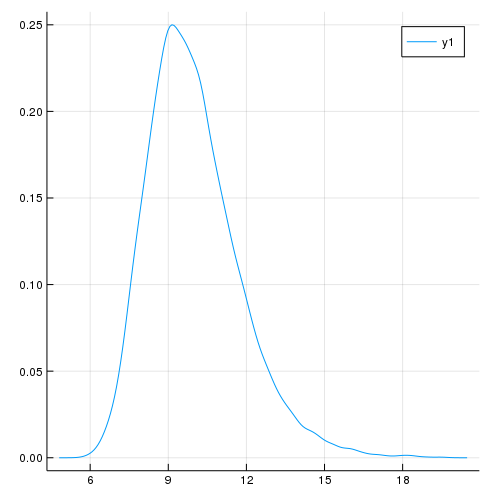

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*